In [1]:
# Import required libraries
import tweepy
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib
import datetime as dt
%matplotlib inline

# Gathering Data

In [2]:
#Load twitter archive enhanced dataset
pd.set_option('display.max_columns', 30)
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Download image prediction dataset using request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [4]:
#load image prediction dataset
df_image=pd.read_csv('image-predictions.tsv', sep='\t')

<strong>Assessing Data Visually</strong>

In [5]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# summarize information
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
#Check the dimensions
df_archive.shape

(2356, 17)

In [8]:
#Load image dataset
df_image=pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
#Display first five rows
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#Display last five rows
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
#Check the dimensions
df_image.shape

(2075, 12)

In [12]:
#Load Json dataset
df_tweet_json=pd.read_json('tweet-json.txt', lines=True)

In [13]:
#Display first five rows
df_tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,...,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",...,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",...,NaN,None,NaN,False,6514,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",...,NaN,None,NaN,False,4328,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",...,NaN,None,NaN,False,8964,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",...,NaN,None,NaN,False,9774,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [14]:
#Check the dimensions
df_tweet_json.shape

(2354, 31)

<strong>Assessing Programmatically</strong>

In [15]:
# check denominator values
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
#Check image number of tweet
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [17]:
# check if every dog has name
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
#check missing values as percentage of each column
archive_missing_percentage = df_archive.isnull().sum()/df_archive.shape[0]*100
archive_missing_percentage

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [19]:
# chech duplicate rows
sum(df_archive.duplicated())

0

In [20]:
#Counts the values of each source.
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [23]:
json_missing_percentage = df_tweet_json.isnull().sum()/df_tweet_json.shape[0]*100
json_missing_percentage

created_at                         0.000000
id                                 0.000000
id_str                             0.000000
full_text                          0.000000
truncated                          0.000000
display_text_range                 0.000000
entities                           0.000000
extended_entities                 11.937128
source                             0.000000
in_reply_to_status_id             96.686491
in_reply_to_status_id_str         96.686491
in_reply_to_user_id               96.686491
in_reply_to_user_id_str           96.686491
in_reply_to_screen_name           96.686491
user                               0.000000
geo                              100.000000
coordinates                      100.000000
place                             99.957519
contributors                     100.000000
is_quote_status                    0.000000
retweet_count                      0.000000
favorite_count                     0.000000
favorited                       

In [24]:
df_tweet_json.possibly_sensitive.value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [25]:
df_tweet_json.possibly_sensitive_appealable.value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

## Data tidyness issues found

<ol>

    <li> The timestamp combines date and time  and they should be splitted into 2 columns  </li>
    <li>The created_at combines date and time  and they should be splitted into 2 columns  </li>
    <li> All of the datasets should be combined into one, so we have to combine the archive, image, and json datasets into one.</li>
        	
</ol>

## Data quality issues found


<ol>
    <li><strong>Data Incompleteness: </strong>archive dataset has missing values.</li>
    <li><strong>Data Incompleteness:</strong> tweet_json dataset has missing values.</li>
     <li><strong>Data Incompleteness:</strong> image dataset has missing rows.</li>
    <li><strong>Data Incompleteness: </strong> tweet_json dataset has missing rows.</li>
    <li><strong>Inappropriate Data Types: </strong> created_at and timestamp columns have incorrect data type they should have datetime as datatype.</li> 
    <li><strong>Inappropriate Data Types: </strong> tweet_id and id coulmns have incorrect data type they should have object as datatype. </li> 
   <li><strong>Data Inconsistency: </strong> Denominator column has differnet vulue. All values should have the same denominator. </li> 
    <li><strong>Data Redundancy: </strong>full_text, and created_at columns, source. </li> 
    <li><strong>Duplicate columns: </strong>possibly_sensitive, possibly_sensitive_appealable have the values and there are meaningless to the analysis. they should be dropped </li> 
     <li><strong>Data Inconsistency: </strong>p1,p2,and p3 columns have some value in lowercase and other in uppercase. All values should be in lowercase. </li> 
    <li><strong>Naming inconsistency:</strong> id column should be renamed as tweet_id. It will help us in merging dataframes.</li> 
</ol>

## Cleaning Data

In [26]:
#Making copy of datasets
df_archive_cleaned=df_archive.copy()
df_image_cleaned=df_image.copy()
df_tweet_json_cleaned=df_tweet_json.copy()


### Cleaning df_archive_cleaned dataset

<strong> Define</strong>


Drop columns that have from 90% of missing values 

<strong>code</strong>

In [27]:
df_archive_cleaned=klib.data_cleaning(df_archive_cleaned)

Shape of cleaned data: (2356, 12)Remaining NAs: 59

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 5
     of which 0 single valued.     Columns: []
Dropped missing values: 11081
Reduced memory by at least: 0.2 MB (-64.52%)



<strong>Test</strong>

In [28]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   int64   
 1   timestamp           2356 non-null   string  
 2   source              2356 non-null   category
 3   text                2356 non-null   string  
 4   expanded_urls       2297 non-null   string  
 5   rating_numerator    2356 non-null   int16   
 6   rating_denominator  2356 non-null   int16   
 7   name                2356 non-null   string  
 8   doggo               2356 non-null   category
 9   floofer             2356 non-null   category
 10  pupper              2356 non-null   category
 11  puppo               2356 non-null   category
dtypes: category(5), int16(2), int64(1), string(4)
memory usage: 113.5 KB


All columns with more 90% of missing values have dropped.

<strong> Define</strong>

Change columns'wrong Data types

<strong>Code</strong>

In [29]:
df_archive_cleaned['tweet_id']=df_archive_cleaned['tweet_id'].astype(str)
df_archive_cleaned['timestamp'] = pd.to_datetime(df_archive_cleaned['timestamp'])

<strong>Test</strong>

In [30]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   category           
 3   text                2356 non-null   string             
 4   expanded_urls       2297 non-null   string             
 5   rating_numerator    2356 non-null   int16              
 6   rating_denominator  2356 non-null   int16              
 7   name                2356 non-null   string             
 8   doggo               2356 non-null   category           
 9   floofer             2356 non-null   category           
 10  pupper              2356 non-null   category           
 11  puppo               2356 non-null   category           
dtypes: category(5), datetime64[ns, UTC

<strong>Define</strong>

Separating Date and time 

<strong>Code</strong>

In [31]:
df_archive_cleaned.insert(2, "date", pd.to_datetime(df_archive_cleaned['timestamp']).dt.date)
df_archive_cleaned.insert(3, "time", pd.to_datetime(df_archive_cleaned['timestamp']).dt.time)

<strong>Test</strong>

In [32]:
df_archive_cleaned.head()

,tweet_id,timestamp,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [34]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

<strong>Define</strong>

Rename the value of Source column

<strong>Code</strong>

In [35]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [36]:
df_archive_cleaned['source'] = df_archive_cleaned['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "iPhone")
df_archive_cleaned['source']  =  df_archive_cleaned['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Vine")
df_archive_cleaned['source'] = df_archive_cleaned['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Twitter Web")
df_archive_cleaned['source'] = df_archive_cleaned['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', "TweetDeck")

C:\Users\GILDAS-PC\AppData\Local\Temp\ipykernel_3800\1686744277.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_cleaned['source'] = df_archive_cleaned['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', "iPhone")
C:\Users\GILDAS-PC\AppData\Local\Temp\ipykernel_3800\1686744277.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_cleaned['source']  =  df_archive_cleaned['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', "Vine")
C:\Users\GILDAS-PC\AppData\Local\Temp\ipykernel_3800\1686744277.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_cleaned['source'] = df_archive_cleaned['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', "Twitter Web")
C:\Users\GILDAS-PC\AppData\L

<strong>Test</strong>

In [37]:
df_archive_cleaned.source.value_counts()

iPhone         2221
Vine             91
Twitter Web      33
TweetDeck        11
Name: source, dtype: int64

<strong>Define</strong>

Combine doggo,floofer,pupper, and puppo columns into single column.

<strong>Code</strong>

In [38]:
df_archive_cleaned.replace('None', np.nan, inplace=True)
df_archive_cleaned.info()
df_archive_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   date                2356 non-null   object             
 3   time                2356 non-null   object             
 4   source              2356 non-null   object             
 5   text                2356 non-null   string             
 6   expanded_urls       2297 non-null   string             
 7   rating_numerator    2356 non-null   int16              
 8   rating_denominator  2356 non-null   int16              
 9   name                1611 non-null   string             
 10  doggo               97 non-null     category           
 11  floofer             10 non-null     category           
 12  pupper              257 non-null  

,tweet_id,timestamp,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


<strong>Code</strong>

In [39]:
df_archive_cleaned['dog_type']= df_archive_cleaned[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

<strong>Test</strong>

In [40]:
df_archive_cleaned.dog_type.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_type, dtype: int64

In [41]:
df_archive_cleaned.replace('',np.nan, inplace=True)
df_archive_cleaned.head()

,tweet_id,timestamp,date,time,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [42]:
df_archive_cleaned.dog_type.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_type, dtype: int64

<strong>Define</strong>

Create new column for rating

<strong>Code</strong>

In [43]:
a=(df_archive_cleaned['rating_numerator']/df_archive_cleaned['rating_denominator']).fillna(0).replace({np.inf:0})
df_archive_cleaned.insert(8,"rating",a)
#(df_archive_cleaned['rating_numerator']/df_archive_cleaned['rating_denominator']).fillna(0).replace({np.inf:0})

<strong>Test</strong>

In [44]:
df_archive_cleaned.head()

,tweet_id,timestamp,date,time,source,text,expanded_urls,rating_numerator,rating,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,1.3,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,1.3,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,1.2,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,1.3,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,1.2,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [45]:
df_archive_cleaned.rating.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.000000        3
0.818182        2
7.500000        2
1.500000        2
42.000000       2
0.636364        1
177.600000      1
1.250000        1
0.733333        1
2.700000        1
3.428571        1
18.200000       1
66.600000       1
1.700000        1
2.600000        1
Name: rating, dtype: int64

<strong>Define</strong>

Change the datatype of new column created dog_type

<strong>Code</strong>

In [46]:
df_archive_cleaned['dog_type'] = pd.Categorical(df_archive_cleaned['dog_type'])

<strong>Test</strong>

In [47]:
df_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   date                2356 non-null   object             
 3   time                2356 non-null   object             
 4   source              2356 non-null   object             
 5   text                2356 non-null   string             
 6   expanded_urls       2297 non-null   string             
 7   rating_numerator    2356 non-null   int16              
 8   rating              2356 non-null   float64            
 9   rating_denominator  2356 non-null   int16              
 10  name                1611 non-null   string             
 11  doggo               97 non-null     category           
 12  floofer             10 non-null   

<strong>Define</strong>

Drop useless columns in dataset

<strong>Code</strong>

In [48]:
df_archive_cleaned.drop(columns=['expanded_urls','timestamp','doggo','floofer','pupper','puppo','rating_denominator','rating_numerator'], axis=1, inplace=True)

<strong>Test</strong>

In [49]:
df_archive_cleaned.head()

,tweet_id,date,time,source,text,rating,name,dog_type
0,892420643555336193,2017-08-01,16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,1.3,Phineas,NaN
1,892177421306343426,2017-08-01,00:17:27,iPhone,This is Tilly. She's just checking pup on you....,1.3,Tilly,NaN
2,891815181378084864,2017-07-31,00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,1.2,Archie,NaN
3,891689557279858688,2017-07-30,15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,1.3,Darla,NaN
4,891327558926688256,2017-07-29,16:00:24,iPhone,This is Franklin. He would like you to stop ca...,1.2,Franklin,NaN


### Cleaning tweet_json dataset

<strong>Define</strong>

Rename id column as Tweet_d 

<strong>Code</strong>

In [50]:
df_tweet_json_cleaned.rename(columns={'id':'tweet_id'}, inplace=True)

<strong>Define</strong>

Drop unwanted columns in tweet_json dataset

 in tweet_json dataset

In [51]:
#df_tweet_json_cleaned.drop(columns=['possibly_sensitive','possibly_sensitive_appealable','full_text','created_at'], axis=1, inplace=True)

<strong>Define</strong>

Drop all columns in tweetjson dataset thta has 90% and above of missing values, duplicate , redundancy and and useless columns.

<strong>Code</strong>

In [52]:
df_tweet_json_cleaned.drop(columns=['retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','geo','coordinates','place','contributors','in_reply_to_user_id_str','in_reply_to_user_id','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','source','entities','extended_entities','id_str','truncated','possibly_sensitive','possibly_sensitive_appealable','full_text','created_at','retweeted','favorited','is_quote_status','user'], axis=1, inplace=True)

<strong>Test</strong>

In [53]:
df_tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   retweet_count       2354 non-null   int64 
 3   favorite_count      2354 non-null   int64 
 4   lang                2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


<strong>Define</strong>

Change the tweet_id column datatype.

<strong>Code</strong>

In [54]:
df_tweet_json_cleaned['tweet_id']=df_tweet_json_cleaned['tweet_id'].astype(str)

<strong>Test</strong>

In [55]:
df_tweet_json_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   object
 1   display_text_range  2354 non-null   object
 2   retweet_count       2354 non-null   int64 
 3   favorite_count      2354 non-null   int64 
 4   lang                2354 non-null   object
dtypes: int64(2), object(3)
memory usage: 92.1+ KB


In [56]:
df_tweet_json_cleaned.head()

,tweet_id,display_text_range,retweet_count,favorite_count,lang
0,892420643555336193,"[0, 85]",8853,39467,en
1,892177421306343426,"[0, 138]",6514,33819,en
2,891815181378084864,"[0, 121]",4328,25461,en
3,891689557279858688,"[0, 79]",8964,42908,en
4,891327558926688256,"[0, 138]",9774,41048,en


### Cleaning  Image dataset

<strong>Define</strong>

Change datatype of  tweet_id Column

<strong>Code</strong>

In [57]:
df_image_cleaned['tweet_id']=df_image['tweet_id'].astype(str)

<strong>Test</strong>

In [58]:
df_image_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<strong>Define</strong>

Change the upper name in p1,p2,and p3 column

<strong>Code</strong>

In [59]:
df_image_cleaned['p1'] = df_image_cleaned['p1'].str.lower()
df_image_cleaned['p2'] = df_image_cleaned['p2'].str.lower()
df_image_cleaned['p3'] = df_image_cleaned['p3'].str.lower()

<strong>Test</strong>

In [60]:
df_image_p=df_image_cleaned[['p1','p2','p3']]

In [61]:
df_image_cleaned.p1.value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [62]:
df_image_p.head(20)

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
5,bernese_mountain_dog,english_springer,greater_swiss_mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


In [63]:
df_image_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


<strong>Define</strong>

Merging Archive and image dataframe.

<strong>Code</strong>

In [64]:
merged_df=df_archive_cleaned.join(df_image_cleaned.set_index('tweet_id'), on='tweet_id')

<strong>Test</strong>

In [65]:
merged_df.head()

,tweet_id,date,time,source,text,rating,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,1.3,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,00:17:27,iPhone,This is Tilly. She's just checking pup on you....,1.3,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,1.2,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,1.3,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29,16:00:24,iPhone,This is Franklin. He would like you to stop ca...,1.2,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2356 non-null   object  
 1   date      2356 non-null   object  
 2   time      2356 non-null   object  
 3   source    2356 non-null   object  
 4   text      2356 non-null   string  
 5   rating    2356 non-null   float64 
 6   name      1611 non-null   string  
 7   dog_type  380 non-null    category
 8   jpg_url   2075 non-null   object  
 9   img_num   2075 non-null   float64 
 10  p1        2075 non-null   object  
 11  p1_conf   2075 non-null   float64 
 12  p1_dog    2075 non-null   object  
 13  p2        2075 non-null   object  
 14  p2_conf   2075 non-null   float64 
 15  p2_dog    2075 non-null   object  
 16  p3        2075 non-null   object  
 17  p3_conf   2075 non-null   float64 
 18  p3_dog    2075 non-null   object  
dtypes: category(1), float64(5), object(11), string(2

<strong>Define</strong>

Merging the combined with Json dataframe

<strong>Code</strong>

In [67]:
twitter_archive_master=merged_df.join(df_tweet_json_cleaned.set_index('tweet_id'), on='tweet_id')

<strong>Test</strong>

In [68]:
twitter_archive_master.head()

,tweet_id,date,time,source,text,rating,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01,16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,1.3,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",8853.0,39467.0,en
1,892177421306343426,2017-08-01,00:17:27,iPhone,This is Tilly. She's just checking pup on you....,1.3,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",6514.0,33819.0,en
2,891815181378084864,2017-07-31,00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,1.2,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",4328.0,25461.0,en
3,891689557279858688,2017-07-30,15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,1.3,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",8964.0,42908.0,en
4,891327558926688256,2017-07-29,16:00:24,iPhone,This is Franklin. He would like you to stop ca...,1.2,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,"[0, 138]",9774.0,41048.0,en


In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   object  
 1   date                2356 non-null   object  
 2   time                2356 non-null   object  
 3   source              2356 non-null   object  
 4   text                2356 non-null   string  
 5   rating              2356 non-null   float64 
 6   name                1611 non-null   string  
 7   dog_type            380 non-null    category
 8   jpg_url             2075 non-null   object  
 9   img_num             2075 non-null   float64 
 10  p1                  2075 non-null   object  
 11  p1_conf             2075 non-null   float64 
 12  p1_dog              2075 non-null   object  
 13  p2                  2075 non-null   object  
 14  p2_conf             2075 non-null   float64 
 15  p2_dog              2075 non-null   ob

In [70]:
twitter_archive_master.describe()

,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2354.000000,2354.000000
mean,1.221513,1.203855,0.594548,1.345886e-01,6.032417e-02,3164.797366,8080.968564
std,4.082695,0.561875,0.271174,1.006657e-01,5.090593e-02,5284.770364,11814.771334
min,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,1.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,624.500000,1415.000000
50%,1.100000,1.000000,0.588230,1.181810e-01,4.944380e-02,1473.500000,3603.500000
75%,1.200000,1.000000,0.843855,1.955655e-01,9.180755e-02,3652.000000,10122.250000
max,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [71]:
#Create master dataset
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)  

# Exploratory Data Analysis(EDA)

In [72]:
df=twitter_archive_master.sort_values(by='favorite_count', ascending=False)
df=df[['favorite_count','retweet_count']]
df.dropna()

,favorite_count,retweet_count
413,132810.0,48265.0
1039,131075.0,79515.0
66,107956.0,45849.0
534,107015.0,56625.0
135,106827.0,32883.0
...,...,...
885,0.0,38.0
479,0.0,4797.0
476,0.0,6154.0
475,0.0,1207.0


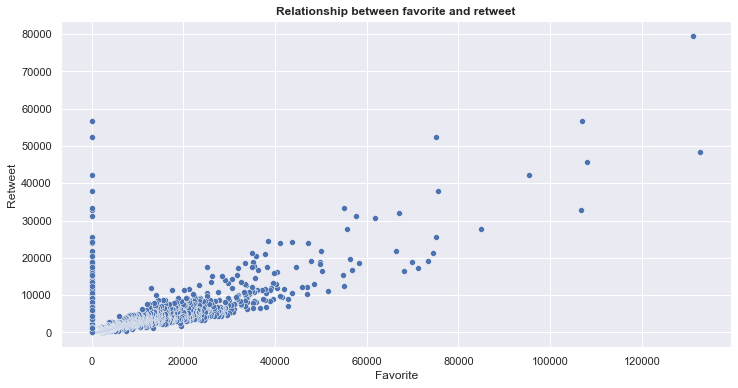

In [73]:
sns.set(rc={'figure.figsize':(12,6)})
sns.scatterplot(x="favorite_count", y="retweet_count", data=df)
plt.title("Relationship between favorite and retweet", fontweight='bold')
plt.xlabel('Favorite')
plt.ylabel('Retweet')
plt.savefig('scatter.png',bbox_inches='tight')
plt.show()

In [74]:
source=twitter_archive_master['source'].value_counts()
source



iPhone         2221
Vine             91
Twitter Web      33
TweetDeck        11
Name: source, dtype: int64

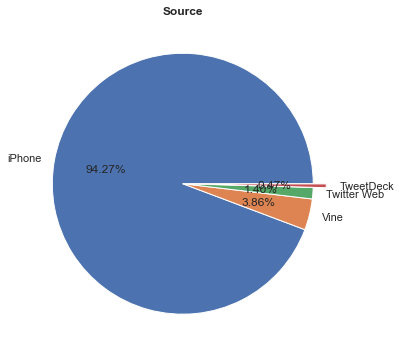

In [75]:
plt.figure(figsize=(8,6))
explode = [0, 0,0,0.1]
twitter_archive_master['source'].value_counts().plot(kind='pie', explode=explode, autopct='%1.2f%%', ylabel="")
plt.title("Source", fontweight='bold')
plt.savefig('pie.png',bbox_inches='tight')
plt.show()

In [76]:
Number_Image=twitter_archive_master['img_num'].value_counts()
Number_Image



1.0    1780
2.0     198
3.0      66
4.0      31
Name: img_num, dtype: int64

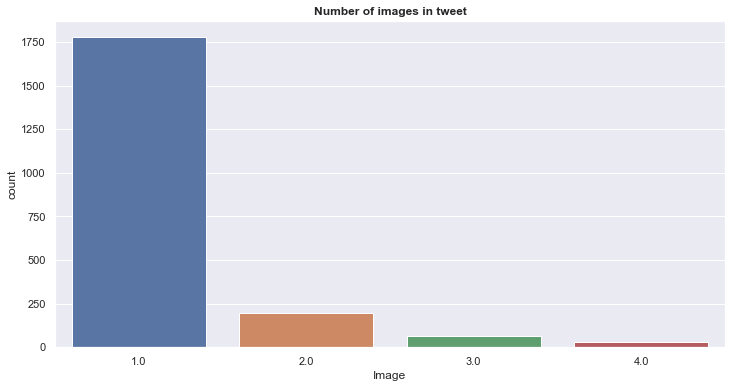

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x=twitter_archive_master['img_num'])
plt.title("Number of images in tweet", fontweight='bold')
plt.xlabel('Image')
plt.savefig('image.png',bbox_inches='tight')
plt.show()

In [78]:
twitter_archive_master['dog_type'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_type, dtype: int64

In [79]:
order=['doggo,puppo','doggo,floofer','floofer','doggo,pupper','puppo','doggo','pupper' ]

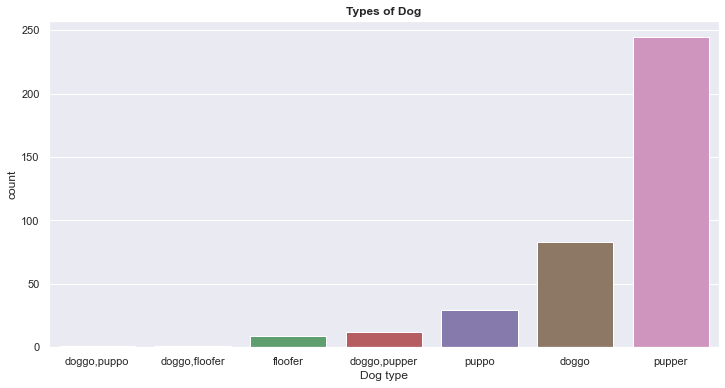

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x=twitter_archive_master['dog_type'],order=order)
plt.title("Types of Dog", fontweight='bold')
plt.xlabel('Dog type')
plt.savefig('type.png',bbox_inches='tight')
plt.show()

In [81]:
df=twitter_archive_master.sort_values(by='favorite_count', ascending=False)
df=df[['favorite_count','time','date']].head()
df.dropna()

,favorite_count,time,date
413,132810.0,18:26:02,2017-01-21
1039,131075.0,18:26:18,2016-06-18
66,107956.0,19:07:24,2017-06-26
534,107015.0,06:17:20,2016-12-09
135,106827.0,00:28:40,2017-05-22


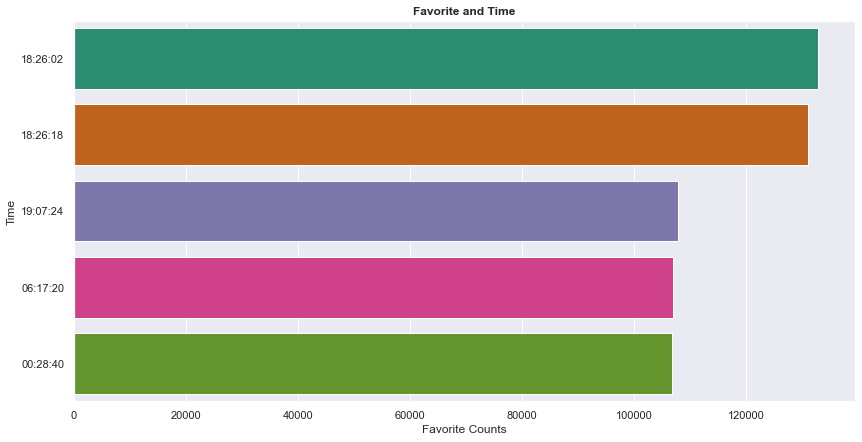

In [82]:
sns.set(rc={'figure.figsize':(14,7)})
sns.barplot(y="time",x="favorite_count",palette = "Dark2",data=df)
plt.title("Favorite and Time", fontweight='bold')
plt.xlabel("Favorite Counts")
plt.ylabel("Time")
plt.savefig('time.png',bbox_inches='tight')
plt.show()